In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import building_unit_types
import os

In [36]:
city_names = ["columbus", "minneapolis"]
unit_type_to_color = ["red", "purple", "teal", "gold", "navy", "magenta", "lime", "black"]


In [ ]:
# def is_successful_upgrade(city_name, unit_type):
#     file_name = os.path.join("output_results",f"{city_name}_upgrades_single_{unit_type}_unit_residence", "tare_output.csv")
#     if os.path.exists(file_name):
#         output = pd.read_csv(file_name)
#         return output.loc[0,"iraRef_mp8_heating_adoption"] != "Tier 4: Averse"
#     return False
def fill_a_table(table_filling_fn=None):
    # print(f"Filling a table with {'is_successful_upgrade' if table_filling_fn is None else table_filling_fn.__name__}")
    table_to_fill = pd.DataFrame(columns=city_names, index=building_unit_types)
    for city_name in city_names:
        for unit_type in building_unit_types:
            file_name = os.path.join("output_results",f"{city_name}_upgrades_single_{unit_type}_unit_residence", "tare_output.csv")
            if os.path.exists(file_name):
                output = pd.read_csv(file_name)
                # print(output.loc[0,"hvac_has_ducts"])
                table_to_fill.loc[unit_type,city_name] = table_filling_fn(output) 
            else:
                table_to_fill.loc[unit_type,city_name] =  None
            # is_successful_upgrade(city_name, unit_type) if table_filling_fn is None else table_filling_fn(city_name, unit_type)
            
    return table_to_fill

def table_of_success_failure():
    return fill_a_table(lambda x: x.loc[0,"iraRef_mp8_heating_adoption"] != "Tier 4: Averse")

def table_of_tier():
    return fill_a_table(lambda x: x.loc[0,"iraRef_mp8_heating_adoption"])

def table_of_hvac_has_ducts():
    return fill_a_table(lambda x: x.loc[0,"hvac_has_ducts"] == "Yes")

In [58]:
success_failure_table = table_of_success_failure()

In [59]:
success_failure_table

,columbus,minneapolis
2,False,True
3_4,False,False
5_9,None,False
10_19,None,None
20_49,None,False
50_plus,None,False
SFA,False,True
SFD,False,True


In [60]:
has_ducts_table = table_of_hvac_has_ducts()

In [61]:
has_ducts_table

,columbus,minneapolis
2,True,True
3_4,True,True
5_9,None,True
10_19,None,None
20_49,None,True
50_plus,None,True
SFA,True,True
SFD,True,True


In [62]:
tier_table = table_of_tier()

In [63]:
tier_table

,columbus,minneapolis
2,Tier 4: Averse,Tier 3: Subsidy-Dependent Feasibility
3_4,Tier 4: Averse,Tier 4: Averse
5_9,None,Tier 4: Averse
10_19,None,None
20_49,None,Tier 4: Averse
50_plus,None,Tier 4: Averse
SFA,Tier 4: Averse,Tier 3: Subsidy-Dependent Feasibility
SFD,Tier 4: Averse,Tier 3: Subsidy-Dependent Feasibility


In [47]:
def table_of_heating_consumption():
    return fill_a_table(lambda x: [x.loc[0,f"baseline_{year}_heating_consumption"] for year in range(2024,2039)])

# city_names = ["columbus", "minneapolis"]
def graph_heating_consumption():
    heating_consumption_table = table_of_heating_consumption()
    # print(heating_consumption_table)
    fig, ax = plt.subplots(2, figsize=(3,6))
    for i, city in enumerate(city_names):
        for j, unit_type in enumerate(building_unit_types):
            # print(heating_consumption_table.loc[unit_type,city])
            if heating_consumption_table.loc[unit_type,city] is not None:
                ax[i].plot(heating_consumption_table.loc[unit_type,city], label=unit_type, color=unit_type_to_color[j])
        ax[i].set_title(city)
        ax[i].set_ylabel("Heating Consumption (MBtu)")
        ax[i].set_xlabel("Year of Equipment Lifetime")
        ax[i].legend(bbox_to_anchor=(1,1),loc="upper left")
    fig.set_tight_layout(True)
    # print(heating_consumption_table)
    # for city_name in city_names:
    #     for unit_type in building_unit_types:
    #         file_name = os.path.join("output_results",f"{city_name}_upgrades_single_{unit_type}_unit_residence", "tare_output.csv")
    
    fig.savefig("heating_consumption_comparison.svg", bbox_inches="tight")
    return heating_consumption_table

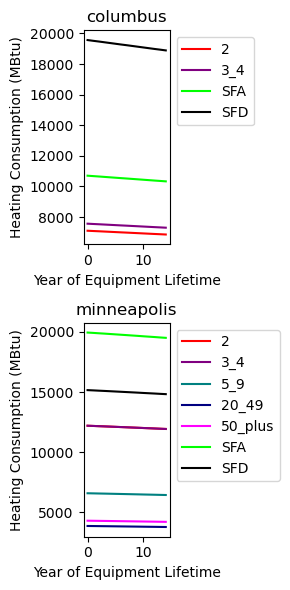

In [48]:
heating_consumption_table = graph_heating_consumption()

In [49]:
def table_of_cooling_consumption():
    return fill_a_table(lambda x: [x.loc[0,f"baseline_{year}_cooling_consumption"] for year in range(2024,2039)])

# city_names = ["columbus", "minneapolis"]
def graph_cooling_consumption():
    cooling_consumption_table = table_of_cooling_consumption()
    # print(cooling_consumption_table)
    fig, ax = plt.subplots(2, figsize=(3,6))
    for i, city in enumerate(city_names):
        for j, unit_type in enumerate(building_unit_types):
            # print(cooling_consumption_table.loc[unit_type,city])
            if cooling_consumption_table.loc[unit_type,city] is not None:
                ax[i].plot(cooling_consumption_table.loc[unit_type,city], label=unit_type, color=unit_type_to_color[j])
        ax[i].set_title(city)
        ax[i].set_ylabel("Cooling Consumption (MBtu)")
        ax[i].set_xlabel("Year of Equipment Lifetime")
        ax[i].legend(bbox_to_anchor=(1,1),loc="upper left")
    fig.set_tight_layout(True)
    # print(cooling_consumption_table)
    # for city_name in city_names:
    #     for unit_type in building_unit_types:
    #         file_name = os.path.join("output_results",f"{city_name}_upgrades_single_{unit_type}_unit_residence", "tare_output.csv")
    
    fig.savefig("cooling_consumption_comparison.svg", bbox_inches="tight")
    return cooling_consumption_table

In [50]:
graph_cooling_consumption()

KeyError: 'baseline_2024_cooling_consumption'

In [76]:
def table_of_NPV_calculations():
    col_names = [
        "iraRef_mp8_heating_public_npv",
        "iraRef_mp8_heating_total_capitalCost",
        "iraRef_mp8_heating_net_capitalCost",
        "iraRef_mp8_heating_private_npv_lessWTP",
        "iraRef_mp8_heating_private_npv_moreWTP",
    # "iraRef_mp8_heating_additional_public_benefit",
    # "iraRef_mp8_heating_total_npv_lessWTP",
    # "iraRef_mp8_heating_total_npv_moreWTP",
    ]
    # col_map = {"iraRef_mp8_heating_public_npv": "Public NPV",
    #             "iraRef_mp8_heating_total_capitalCost": "Capital Cost",
    #             "iraRef_mp8_heating_additional_public_benefit": "Additional Public Benefit",
    #             "iraRef_mp8_heating_total_npv_lessWTP": "NPV Lower Bound",
    #             "iraRef_mp8_heating_total_npv_moreWTP": "NPV Upper Bound"}
    new_col_names = [
        "Public NPV",
        "Total Capital Cost",
        "Net Capital Cost",
        "Private NPV Lower Bound",
        "Private NPV Upper Bound",
        # "Additional Public Benefit",
        # "NPV Lower Bound",
        # "NPV Upper Bound",
        ]
    intermediate_table = fill_a_table(lambda x: [x.loc[0,col_name] for col_name in col_names])
    new_columns = pd.MultiIndex.from_product([intermediate_table.columns, new_col_names])
    new_df = pd.DataFrame(index=intermediate_table.index, columns=new_columns)
    # Fill the new DataFrame with split list values or None
    for col in intermediate_table.columns:
        for i, val in intermediate_table[col].items():
            if isinstance(val, list):
                # If it's a list, spread the values across the 5 columns
                new_df.loc[i, col] = val
            else:
                # If it's None, fill with None in all 5 sub-columns
                new_df.loc[i, col] = [None] * len(col_names)
    return new_df

In [77]:
NPV_calculations_table = table_of_NPV_calculations()

In [78]:
NPV_calculations_table

columbus                                      \
        Public NPV Total Capital Cost Net Capital Cost   
2          4588.53            8673.15          6475.49   
3_4        4886.31            7243.37          5042.54   
5_9           None               None             None   
10_19         None               None             None   
20_49         None               None             None   
50_plus       None               None             None   
SFA        6913.51            6246.61          4035.42   
SFD       12642.34           10360.68          8054.59   

                                                        minneapolis  \
        Private NPV Lower Bound Private NPV Upper Bound  Public NPV   
2                     -11167.12                -8969.46     7927.43   
3_4                    -9841.19                -7640.36     7927.43   
5_9                        None                    None     4274.12   
10_19                      None                    None        None   
20_49                      None                    None         0.0   
50_plus                    None                    None     2789.09   
SFA                    -9479.06                -7267.87    12968.07   
SFD                   -16281.86               -13975.77     9853.69   

                                                                     \
        Total Capital Cost Net Capital Cost Private NPV Lower Bound   
2                  7835.42          5618.48                -9797.17   
3_4                8738.02          6521.08               -10699.77   
5_9                5828.99          3660.55                -6983.78   
10_19                 None             None                    None   
20_49              6130.51          4035.96                -8267.85   
50_plus            6152.13          4005.42                -6876.31   
SFA                7569.41          5333.97               -10694.06   
SFD                9039.38           6814.3               -11442.24   

                                 
        Private NPV Upper Bound  
2                      -7580.23  
3_4                    -8482.83  
5_9                    -4815.34  
10_19                      None  
20_49                   -6173.3  
50_plus                 -4729.6  
SFA                    -8458.62  
SFD                    -9217.16